## 데이터 불러들이기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# .npy : numpy 기반의 배열 데이터
# - npy 파일은 numpy에서 load() 함수를 통해 읽어들이기
# - npy는 numpy기반의 기본  포맷파일 
fruits = np.load('./data/09_fruits_300.npy')

# 첫번째 차원 : 이미지 갯수
# 두번째 차원 : 이미지 높이
# 세번째 차원 : 이미지 너비
print(fruits.shape)

(300, 100, 100)


In [5]:
# 픽셀데이터 : 0~225 사잇값
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


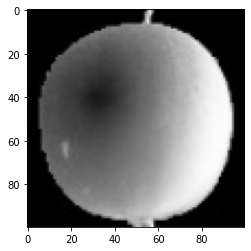

In [24]:
# cmap = gray : 바탕은 검은색, 이미지는 흰색계열
# - 0에 가까운 픽셀 값일 수록 검은색으로 표현됨
# - 1에 가까운 픽셀 값일 수록 흰색으로 표현됨 
plt.imshow(fruits[0], cmap='gray')
plt.show()

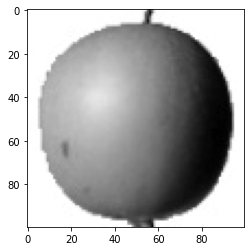

In [28]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

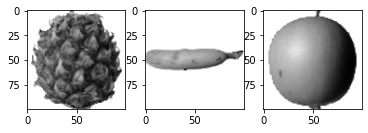

In [37]:
# fruits[0~99] : 사과
# fruits[100-199] : 파인애플
# fruits[200~299] : 바나나

fig,axs = plt.subplots(1,3)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
axs[2].imshow(fruits[0], cmap='gray_r')


## 픽셀값 분석하기

In [44]:
# 100*100 이미지 데이터를 펼쳐서

# 1차원 데이터로 변환하기
# 행 100개 열 100000개 
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)
fruits[0:100]

print(apple.shape)
print(pineapple.shape)
print(banana.shape)

(100, 10000)
(100, 10000)
(100, 10000)


In [48]:
# 각 행의 평균값 (10000개의 평균)
# axis =1 열기준
print(apple.mean(axis=1))
print(pineapple.mean(axis=1))
print(banana.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]
[ 99.3239  87.1622  97.193   97.4689  98.8892  97.8819  95.1444  92.9461
  95.8412  96

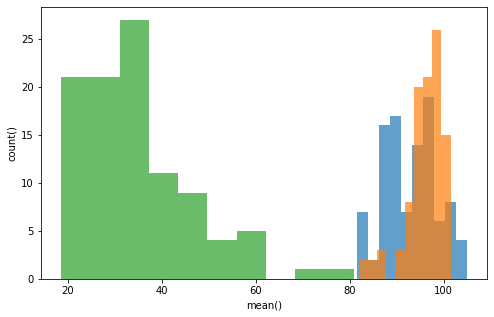

In [61]:
# alpha = 투명도
plt.figure(figsize=(8,5))
plt.hist(np.mean(apple, axis=1), alpha=0.7)
plt.hist(np.mean(pineapple, axis=1), alpha=0.7)
plt.hist(np.mean(banana, axis=1), alpha=0.7)
plt.xlabel('mean()')
plt.ylabel('count()')
plt.show()

# [해석]
# 바나나의 평균읜 40밑으로 집중되어 있으며
# 사과와 파인애플은 90~100사이에 집중되어있다
# 바나나는 픽셀 평균값 만으로도 사과 및 파인애플과 구분 시킬 수 있다
# 사과와 파인애플은 평균값으로 구분 불가능 

<BarContainer object of 10000 artists>

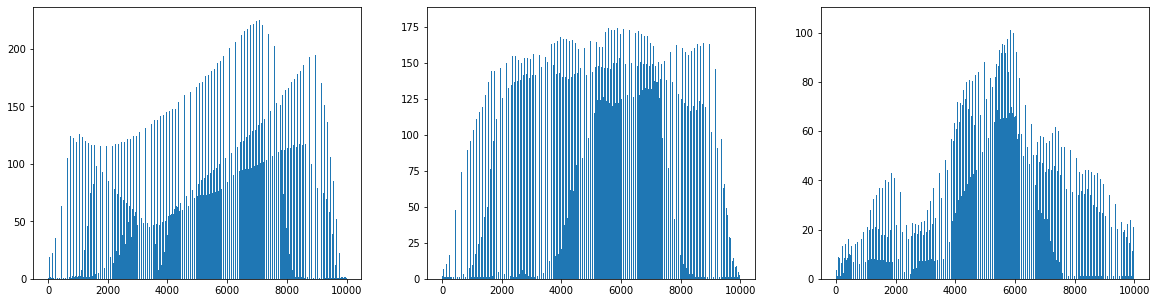

In [62]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))


# [해석]
# 과일마다 y축의 빈도 값이 높은 구간 확인
# - 사과의 경우 x 축의 평균 값이 커질 수록 값이 높아진다
# - 파인애플의 경우 전체적으로 고르다
# - 바나나의 경우 중앙의 픽셀값이 높다 

In [66]:
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

# 그림 그리기 위해 다시 2차원으로 

print(apple_mean.shape)
print(pineapple_mean.shape)
print(banana_mean.shape)


(100, 100)
(100, 100)
(100, 100)


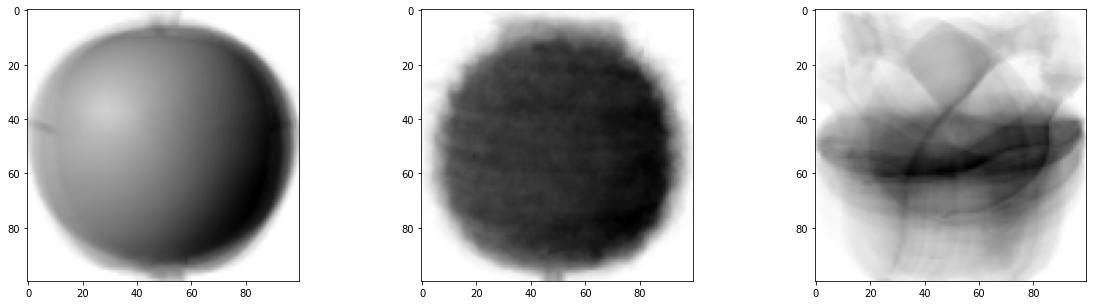

In [68]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()

# 사과 파인애플 바나나 픽셀의 평균을 가지고 다시 각각을 그려본다 

## 평균값과 가까운 사진 고르기

In [74]:
### 사과 사진으로 먼저 진행 
# abs : 절대값 
# 0에 가까울수록 사과일 확률이 높다 
# abs_dff : 절대값 오차 
abs_diff = np.abs(fruits-apple_mean)
print(abs_diff.shape)

# 절대값 오차를 평균내기
# (300,100,100)  -> 300: aixs[0] , 100 : axis[1] , 100 : axis[2] 가지고 평균내기 
# 총 300개 , 평균 - 사과평균 : 300개의 데이터 생성, 300개 중에서 오차 작은값이 사과일 확률 높은것으로 판단
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean)

(300, 100, 100)
[17.37576  13.508874 17.183394 15.68311  17.983306 20.565392 16.795812
 16.144276 19.611994 21.32059  16.454222 16.590134 13.37039  17.23263
 15.92806  15.496638 18.582212 16.48196  27.651556 19.7871   20.826912
 16.417934 17.059946 15.904296 15.086176 19.371364 24.076362 14.777732
 19.20517  20.805182 14.797906 18.658418 15.973216 13.04259  18.381052
 16.59904  16.288504 18.960586 13.88574  16.497594 18.40376  19.174642
 29.096702 18.40849  28.223962 21.42994  19.740466 15.590532 13.082678
 18.765996 14.391198 21.464746 26.261028 15.887148 18.568706 16.410426
 17.108034 13.178824 18.199846 13.503056 20.845032 16.898184 22.81774
 18.99896  19.102706 16.636216 14.845644 19.357872 14.778086 14.468082
 13.085526 15.946606 20.42774  16.241996 13.720382 18.416166 15.229106
 16.411342 13.47148  20.050622 17.296816 21.071312 18.451708 19.645494
 15.585712 20.582004 13.850318 13.269222 21.875262 17.152098 15.60477
 23.890138 14.442124 18.794826 15.750524 16.58135  19.375552 17.

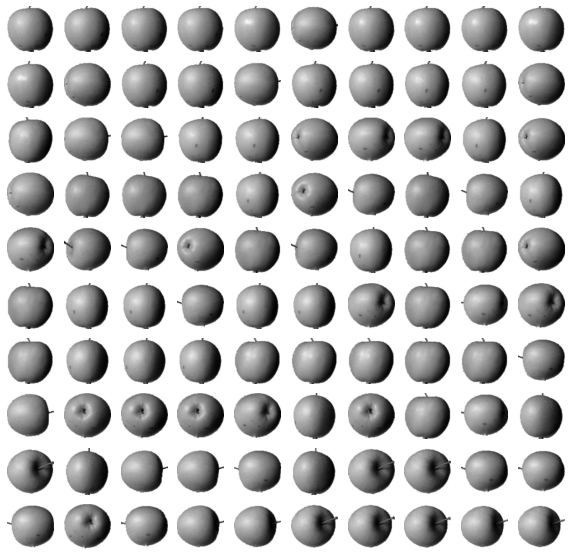

In [78]:
# 오차가 가장 작은값 (abs_mean이 작은값) 100개는 사과일 가능성이 높다
# 300개의 과일에 대한 오차평균값을 오름차순하여 100개 추출
apple_index = np.argsort(abs_mean)[:100]
# apple_index
fig, axs = plt.subplots(10,10,figsize=(10,10))

# 작은값 100개의 index를 알아내서 해당 행의 값을 추출해 그림그리기
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        # 좌표 그리지 않기
        axs[i,j].axis('off')
plt.show()

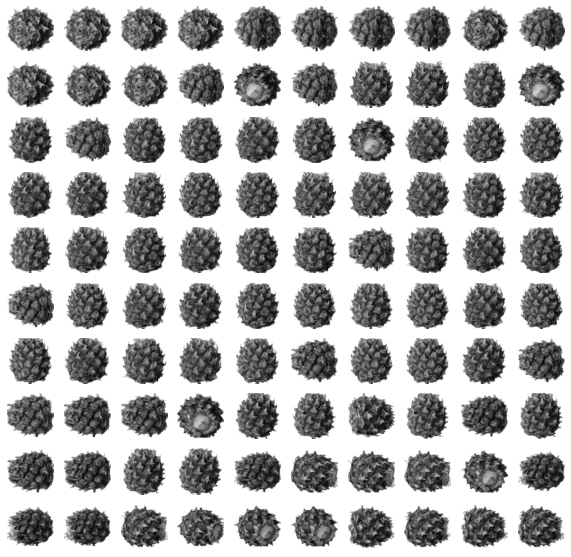

In [80]:
pineapple_index = np.argsort(abs_mean)[100:200]
# apple_index
fig, axs = plt.subplots(10,10,figsize=(10,10))

# 작은값 100개의 index를 알아내서 해당 행의 값을 추출해 그림그리기
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[pineapple_index[i*10+j]], cmap='gray_r')
        # 좌표 그리지 않기
        axs[i,j].axis('off')
plt.show()

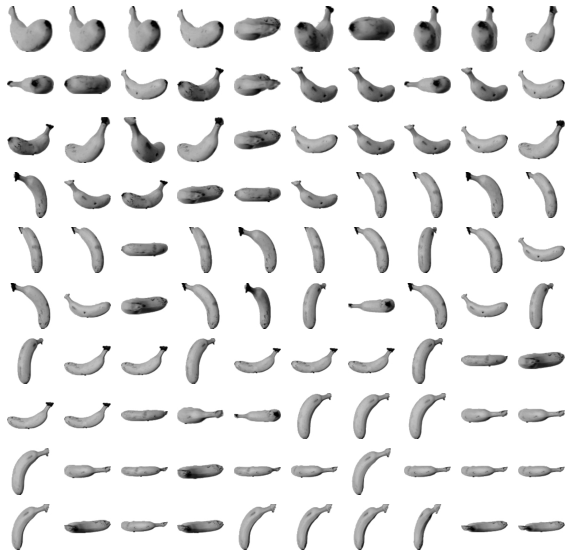

In [81]:
banana_index = np.argsort(abs_mean)[200:300]
# apple_index
fig, axs = plt.subplots(10,10,figsize=(10,10))

# 작은값 100개의 index를 알아내서 해당 행의 값을 추출해 그림그리기
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[banana_index[i*10+j]], cmap='gray_r')
        # 좌표 그리지 않기
        axs[i,j].axis('off')
plt.show()

## 파인애플 절대값 오차 

In [86]:
abs_diff = np.abs(fruits-pineapple_mean)
print(abs_diff.shape)

# 절대값 오차를 평균내기
# (300,100,100)  -> 300: aixs[0] , 100 : axis[1] , 100 : axis[2] 가지고 평균내기 
# 총 300개 , 평균 - 사과평균 : 300개의 데이터 생성, 300개 중에서 오차 작은값이 사과일 확률 높은것으로 판단
abs_mean = np.mean(abs_diff, axis=(1,2))
# print(abs_mean)

(300, 100, 100)


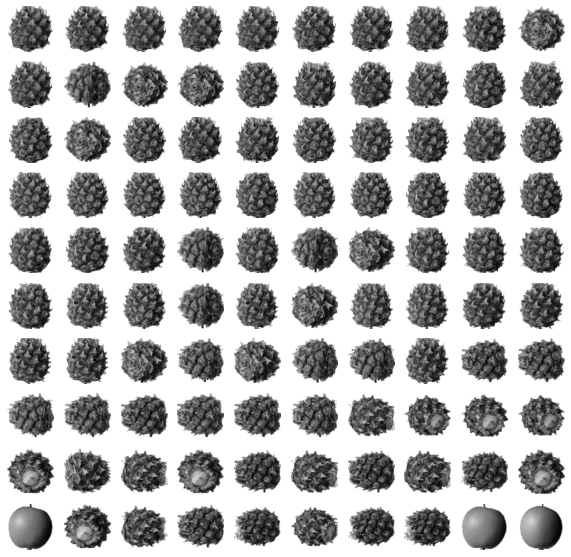

In [83]:
pineapple_index = np.argsort(abs_mean)[:100]
# apple_index
fig, axs = plt.subplots(10,10,figsize=(10,10))

# 작은값 100개의 index를 알아내서 해당 행의 값을 추출해 그림그리기
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[pineapple_index[i*10+j]], cmap='gray_r')
        # 좌표 그리지 않기
        axs[i,j].axis('off')
plt.show()

## 바나나 절대값 오차

In [88]:
abs_diff = np.abs(fruits-banana_mean)
print(abs_diff.shape)

# 절대값 오차를 평균내기
# (300,100,100)  -> 300: aixs[0] , 100 : axis[1] , 100 : axis[2] 가지고 평균내기 
# 총 300개 , 평균 - 사과평균 : 300개의 데이터 생성, 300개 중에서 오차 작은값이 사과일 확률 높은것으로 판단
abs_mean = np.mean(abs_diff, axis=(1,2))

(300, 100, 100)


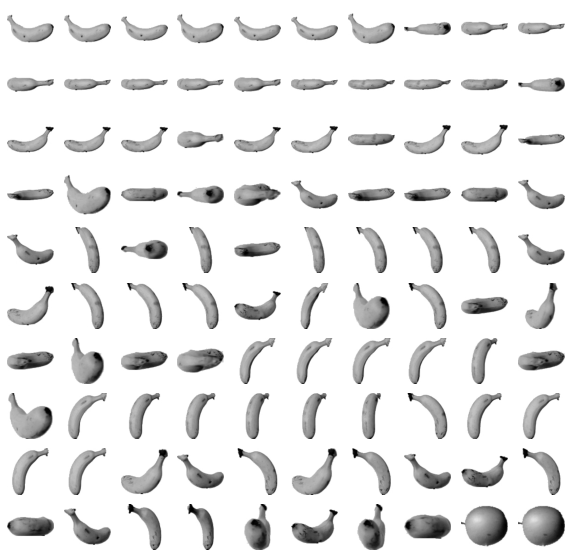

In [89]:
banana_index = np.argsort(abs_mean)[:100]
# apple_index
fig, axs = plt.subplots(10,10,figsize=(10,10))

# 작은값 100개의 index를 알아내서 해당 행의 값을 추출해 그림그리기
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[banana_index[i*10+j]], cmap='gray_r')
        # 좌표 그리지 않기
        axs[i,j].axis('off')
plt.show()

In [ ]:
### [정리]
# - 특징(패턴)에 잘 맞게 분류
# - 오차평균을 내기위해서 사람이 개입해서 패턴을 정함
#   ( 정답을 만들어 준것 ) --> 지도(학습)
# - 오차평균을 모델에서 해주면 비지도(학습)로 가능 